In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import datetime
from datetime import timedelta

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import pyplot
from matplotlib.gridspec import GridSpec
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
import itertools

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

import glob
from os import *
import math

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print('{}: {}'.format(key,plt.rcParamsDefault[key]))
        
font_path = 'C:/Windows/Fonts/malgunbd.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 12

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'Impact', 'Western', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
legend.title_fontsize:

In [16]:
file_path = 'J:/claim_19.xlsx'

In [17]:
excel = pd.read_excel(file_path, index=False)

In [18]:
excel.columns

Index(['NO', 'Type', '차종', 'Project Name', '품번', '대표품번', '부품명', '시스템', '현상코드',
       '현상명', 'IQS', 'VDS', 'CR', '원인코드', '원인명', '특이사항', 'DTC1', 'DTC2',
       'DTC3', '생산일', '생산월', '판매일', '판매월', '수리시작일', '수리월', '확정일', '확정월',
       '재고일수', '사용일수', '주행거리Km', '부품금액', '공임금액', '외주금액', '전체금액', '통합 RO No.',
       'R/O NO', '판매국가', '발생지역', '발생지역(관리)', '발생지역세부', '판매딜러', '수리처', '업체국가',
       '업체코드', '업체명', '변제업체국가', '변제업체코드', '변제업체명', 'GSW 귀책업체 코드', 'GSW 귀책업체',
       '작업코드', '판매구분', 'VIN', 'MI코드', '차종.1', 'Option code', 'Version', '엔진번호',
       '변속기번호', 'C/10000', 'CS\n\n(사용기간 미적용)', 'RS(사용기간 미적용)', '확정전(1)확정(2)',
       '생산법인', '공장', '엔진명', '엔진공장', '엔진생산일자', '변속기 프로젝트 코드', '변속기공장',
       '비품질클레임여부', 'VAATZ기준평가업체코드', 'VAATZ기준평가업체명', '모비스납입', '글로비스납입',
       '캠페인 NO', '캠페인명', 'Body Color1'],
      dtype='object')

In [20]:
excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361062 entries, 0 to 361061
Data columns (total 78 columns):
NO                361062 non-null object
Type              361062 non-null object
차종                361062 non-null object
Project Name      361061 non-null object
품번                361061 non-null object
대표품번              361061 non-null object
부품명               361062 non-null object
시스템               361062 non-null object
현상코드              361062 non-null object
현상명               207859 non-null object
IQS               1 non-null object
VDS               1 non-null object
CR                1 non-null object
원인코드              361062 non-null object
원인명               361062 non-null object
특이사항              148090 non-null object
DTC1              361062 non-null object
DTC2              361062 non-null object
DTC3              361062 non-null object
생산일               361062 non-null object
생산월               361062 non-null object
판매일               361062 non-null object
판매

In [19]:
excel.head()

NO  Type                         차종 Project Name            품번   대표품번  \
0  NO  Type                         차종          NaN           NaN    NaN   
1   1     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
2   2     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
3   3     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
4   4     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   

           부품명  시스템  현상코드                 현상명  ...  변속기 프로젝트 코드  변속기공장  \
0          부품명  시스템  현상코드                 현상명  ...  변속기 프로젝트 코드  변속기공장   
1  PCMTLM03260    -   M45   오디오/AVN 작동불량_작동불량  ...       다이모스서산      0   
2  PCMTLM03260    -   M62  수신불량/연결불량_GPS 수신불량  ...        파워텍서산      0   
3  PCMTLM03260    -   M32    네비게이션 불량_현위치표시오류  ...        파워텍서산      0   
4  PCMTLM03260    -   M62  수신불량/연결불량_GPS 수신불량  ...        파워텍서산      0   

   비품질클레임여부  VAATZ기준평가업체코드  VAATZ기준평가업체명  모비스납입  글로비스납입  캠페인 NO  캠페인명  \
0  비품질클레임여부  VAATZ기준평가업체코드  VAATZ기준평가업체명  모비스납입  글로비스납입  캠페인 NO  캠페인명   
1         @              @             @    NaN     [@]     [@]     @   
2         @              @             @    NaN     [@]     [@]     @   
3         @              @             @    NaN     [@]     [@]     @   
4         @              @             @    NaN     [@]     [@]     @   

  Body Color1  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 78 columns]

In [21]:
excel.drop(columns=['NO','IQS', 'VDS', 'CR','판매구분'],inplace=True)
excel.head()

Type                         차종 Project Name            품번   대표품번  \
0  Type                         차종          NaN           NaN    NaN   
1     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
2     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
3     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
4     Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   

           부품명  시스템  현상코드                 현상명  원인코드  ...  변속기 프로젝트 코드  변속기공장  \
0          부품명  시스템  현상코드                 현상명  원인코드  ...  변속기 프로젝트 코드  변속기공장   
1  PCMTLM03260    -   M45   오디오/AVN 작동불량_작동불량   ZZ1  ...       다이모스서산      0   
2  PCMTLM03260    -   M62  수신불량/연결불량_GPS 수신불량   ZZ1  ...        파워텍서산      0   
3  PCMTLM03260    -   M32    네비게이션 불량_현위치표시오류   ZZ1  ...        파워텍서산      0   
4  PCMTLM03260    -   M62  수신불량/연결불량_GPS 수신불량   ZZ3  ...        파워텍서산      0   

   비품질클레임여부  VAATZ기준평가업체코드  VAATZ기준평가업체명  모비스납입  글로비스납입  캠페인 NO  캠페인명  \
0  비품질클레임여부  VAATZ기준평가업체코드  VAATZ기준평가업체명  모비스납입  글로비스납입  캠페인 NO  캠페인명   
1         @              @             @    NaN     [@]     [@]     @   
2         @              @             @    NaN     [@]     [@]     @   
3         @              @             @    NaN     [@]     [@]     @   
4         @              @             @    NaN     [@]     [@]     @   

  Body Color1  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 73 columns]

In [24]:
excel.to_csv('claim_19.csv', index=False, encoding='utf-8')

In [3]:
df = pd.read_csv('claim_19.csv')
df = df.drop(0,0)

C:\Users\2801123\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (16,18,22,23,24,25,37,40,43,45,56,64,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

Type                         차종 Project Name            품번   대표품번  \
1    Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
2    Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
3    Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
4    Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   
5    Z  BONGO-3 04/17 SPECIAL OEM           PU  PCMTL M03260  PCMTL   

           부품명 시스템 현상코드                 현상명 원인코드  ... 변속기 프로젝트 코드 변속기공장  \
1  PCMTLM03260   -  M45   오디오/AVN 작동불량_작동불량  ZZ1  ...      다이모스서산     0   
2  PCMTLM03260   -  M62  수신불량/연결불량_GPS 수신불량  ZZ1  ...       파워텍서산     0   
3  PCMTLM03260   -  M32    네비게이션 불량_현위치표시오류  ZZ1  ...       파워텍서산     0   
4  PCMTLM03260   -  M62  수신불량/연결불량_GPS 수신불량  ZZ3  ...       파워텍서산     0   
5  PCMTLM03260   -  M45   오디오/AVN 작동불량_작동불량  ZZ3  ...      다이모스서산     0   

  비품질클레임여부 VAATZ기준평가업체코드 VAATZ기준평가업체명 모비스납입 글로비스납입 캠페인 NO 캠페인명 Body Color1  
1        @             @            @   NaN    [@]    [@]    @         NaN  
2        @             @            @   NaN    [@]    [@]    @         NaN  
3        @             @            @   NaN    [@]    [@]    @         NaN  
4        @             @            @   NaN    [@]    [@]    @         NaN  
5        @             @            @   NaN    [@]    [@]    @         NaN  

[5 rows x 73 columns]

In [5]:
df.columns

Index(['Type', '차종', 'Project Name', '품번', '대표품번', '부품명', '시스템', '현상코드', '현상명',
       '원인코드', '원인명', '특이사항', 'DTC1', 'DTC2', 'DTC3', '생산일', '생산월', '판매일',
       '판매월', '수리시작일', '수리월', '확정일', '확정월', '재고일수', '사용일수', '주행거리Km', '부품금액',
       '공임금액', '외주금액', '전체금액', '통합 RO No.', 'R/O NO', '판매국가', '발생지역',
       '발생지역(관리)', '발생지역세부', '판매딜러', '수리처', '업체국가', '업체코드', '업체명', '변제업체국가',
       '변제업체코드', '변제업체명', 'GSW 귀책업체 코드', 'GSW 귀책업체', '작업코드', 'VIN', 'MI코드',
       '차종.1', 'Option code', 'Version', '엔진번호', '변속기번호', 'C/10000',
       'CS\n\n(사용기간 미적용)', 'RS(사용기간 미적용)', '확정전(1)확정(2)', '생산법인', '공장', '엔진명',
       '엔진공장', '엔진생산일자', '변속기 프로젝트 코드', '변속기공장', '비품질클레임여부', 'VAATZ기준평가업체코드',
       'VAATZ기준평가업체명', '모비스납입', '글로비스납입', '캠페인 NO', '캠페인명', 'Body Color1'],
      dtype='object')

In [6]:
df['차종'].unique()

array(['BONGO-3 04/17 SPECIAL OEM', '(YP) ALL NEW CARNIVAL [A9]',
       '(UM) ALL New SORENTO [C5]', '(HM) MOHAVE [EN]',
       '(CK) STINGER [J5]', '(JA) MORNING [G6]', '(BD) K3 [DJ]',
       '(YG) K7 [F6]', '(TAM) RAY [A3]', '(SP2) SP2 19(B-SUV) [TH]',
       '(QL) SPORTAGE [D9]', '(YGE) K7 HEV [G0]', '(GZ) 그랜버드 08 [R4]',
       '(RJ) RJ 18 [J6]', '(YB) PRIDE [H8]', '(DE) NIRO (DE) NIRO [G5]',
       '(JF) K5 [D4]', '(JFE) K5 HEV [A8]', '(SK3) SK3 19 [SK]',
       '(DEEV) NIRO EV 19 [DQ]', '(SK3EV) SK3 EV19 [J2]',
       '(DL3) DL3 20 [EX]'], dtype=object)

In [7]:
df['Project Name'].unique()

array(['PU', 'YP', 'UM', 'HM', 'CK', 'JA', 'BD', 'YG', 'TAM', 'SP2', 'QL',
       'YGE', 'GZ', 'RJ', 'YB', 'DE', 'JF', 'JFE', 'SK3', 'DEEV', 'SK3EV',
       'DL3'], dtype=object)

In [8]:
df['부품명'].value_counts()

@                      126013
캡－프론트 후크                19484
컬럼  어셈블리－스티어링           15002
밸브  어셈블리－에어  컨트롤        14686
밸브 & 브라켓-솔레노이드          14296
                        ...  
120                         1
아웃리거 NO.3                   1
와이어링 & 커넥터 어셈블리             1
액츄에이터－헤드램프 레벨링 이큅먼트         1
베어링                         1
Name: 부품명, Length: 3844, dtype: int64

In [9]:
df['현상명'].value_counts()

경고등 점등_경고등 점등      61329
작동불량_작동안됨          26340
소음/이음_작동시          12810
작동불량_오작동           11665
차체 도장 불량_긁힘/벗겨짐     7092
                   ...  
방향지시등 조종 불량            1
도어 진동/떨림_공회전시          1
선바이저 소음(잡소리)           1
동력전달(하체) 크랙/파손         1
팬/블로워 소음 과다            1
Name: 현상명, Length: 516, dtype: int64

In [10]:
df['원인명'].value_counts()

@                       265552
상품성/성능 불만                33442
단품 자체 불량(내부,기능,프로그램)     26939
단품 재질 불량                  9460
차량 차체 불량                  8193
조립/조정/작업 불량               7715
단품 외관 손상/파손 불량            3289
구조적 문제(설계)                2274
외부환경 영향 불량                2229
OTHERS                    1730
차량시스템 불량(통신 등)             226
OUT OF BALANCE               8
FLAW IN MATERIAL             4
Name: 원인명, dtype: int64

In [11]:
df['공장'].unique()

array(['A-Ⅱ 2.5 ', 'θ-FR 2.4(LPI)', 'R 2.2 ', 'λ-Ⅱ 3.3(GDI)', 'S-Ⅱ 3.0 ',
       'θ-Ⅱ 2.0(TGDI)', 'θ-Ⅱ FR 2.0(TGDI)', 'κ 1.0(T-GDI)', 'γ 1.6(TGDI)',
       'λ-Ⅱ 3.0(GDI)', 'κ 1.0(B/F)', 'ν 2.0 ', 'R 2.0 ', 'θ-Ⅱ 2.4(GDI)',
       'G4KⅢ 2.5 GDI', 'λⅡ 3.3(T-GDI)', 'κ 1.0 ', 'θ-Ⅱ 2.4 ',
       'ENGINE CODE-D6CG(440PS/214KGM) 15EM', 'G4FⅢ 1.6 MPI',
       'λ-Ⅱ 3.8(GDI)', 'κ 1.4', 'D4FⅢ 1.6 VGT', 'κ 1.6(GDI HEV)',
       'U-Ⅱ 1.6 ', 'ν 2.0(LPI)', 'ν 2.0(GDI)', 'λ-Ⅱ 3.0(LPI)', nan,
       'κ 1.2 ', 'λ-Ⅱ 3.5 ', 'γ 1.6 ', 'U-Ⅱ 1.7 ', 'J2 2.7 ', 'λ-Ⅱ 3.3',
       'JT 3.0 ', 'τ 5.0(GDI)', 'λ 3.8 ', 'G4NⅢ 2.0 MPI',
       'G4FⅢ 1.6 T-GDi ', 'G4NⅢ 2.0 LPI'], dtype=object)

In [12]:
df['생산법인'].unique()

array(['광주3', '소하1', '화성1', '서산', '화성2', '화성3', '광주1', '광주2', '광주4 버스',
       '소하2'], dtype=object)

In [13]:
df['생산일'].value_counts()

2019-01-08    4816
2019-01-09    4736
2019-01-11    4609
2019-01-14    4453
2019-01-10    4451
              ... 
2019-12-19       2
2019-12-13       2
2019-12-26       1
2019-12-24       1
2019-11-24       1
Name: 생산일, Length: 275, dtype: int64

In [14]:
# df['생산일'] = pd.to_datetime(df['생산일'])
# df.set_index('생산일',inplace=True)

In [15]:
# df['전체금액'].resample('D').sum()

* Project Name별 1년간 시간흐름에 따른 불량별 건수변화
* x축 : 불량별, y축 : 건수, 색깔구분(hue) : Project Name

In [16]:
df1 = df[['생산일','Project Name','현상명','원인명','주행거리Km','전체금액']].copy()
df1 = df1.reset_index(drop=True)

In [17]:
df1.head()

생산일 Project Name                 현상명                   원인명 주행거리Km  \
0  2019-01-25           PU   오디오/AVN 작동불량_작동불량            구조적 문제(설계)     92   
1  2019-01-18           PU  수신불량/연결불량_GPS 수신불량            구조적 문제(설계)   3068   
2  2019-01-29           PU    네비게이션 불량_현위치표시오류            구조적 문제(설계)    405   
3  2019-01-18           PU  수신불량/연결불량_GPS 수신불량  단품 자체 불량(내부,기능,프로그램)    274   
4  2019-01-24           PU   오디오/AVN 작동불량_작동불량  단품 자체 불량(내부,기능,프로그램)   2112   

   전체금액  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

In [18]:
df1.columns

Index(['생산일', 'Project Name', '현상명', '원인명', '주행거리Km', '전체금액'], dtype='object')

In [19]:
type(df1['생산일'][0])

str

In [20]:
df1.sort_values('생산일',ascending=True,inplace=True)
df1

생산일 Project Name           현상명        원인명 주행거리Km    전체금액
175408  2019-01-03          SK3           NaN          @     16   66.53
173204  2019-01-03          SK3           NaN          @      2   10.82
173199  2019-01-03          SK3           NaN          @      2   10.82
173175  2019-01-03          SK3           NaN          @      2   10.82
173164  2019-01-03          SK3           NaN          @      2   10.82
...            ...          ...           ...        ...    ...     ...
56393   2019-12-23           HM    엔진오일 문제_누유  상품성/성능 불만      4  200.46
62942   2019-12-23          SP2        배터리 방전          @     10   20.90
66251   2019-12-23          DL3           NaN          @    852    7.91
56589   2019-12-24          SP2  조립 문제_들뜸/떨어짐  상품성/성능 불만     16  134.59
134010  2019-12-26          SP2     작동불량_작동안됨  상품성/성능 불만     12   64.50

[361061 rows x 6 columns]

In [21]:
df1 = df1.reset_index(drop=True)

In [22]:
df1

생산일 Project Name           현상명        원인명 주행거리Km    전체금액
0       2019-01-03          SK3           NaN          @     16   66.53
1       2019-01-03          SK3           NaN          @      2   10.82
2       2019-01-03          SK3           NaN          @      2   10.82
3       2019-01-03          SK3           NaN          @      2   10.82
4       2019-01-03          SK3           NaN          @      2   10.82
...            ...          ...           ...        ...    ...     ...
361056  2019-12-23           HM    엔진오일 문제_누유  상품성/성능 불만      4  200.46
361057  2019-12-23          SP2        배터리 방전          @     10   20.90
361058  2019-12-23          DL3           NaN          @    852    7.91
361059  2019-12-24          SP2  조립 문제_들뜸/떨어짐  상품성/성능 불만     16  134.59
361060  2019-12-26          SP2     작동불량_작동안됨  상품성/성능 불만     12   64.50

[361061 rows x 6 columns]

In [23]:
type(df1['현상명'][0])

float

In [24]:
isinstance(df1['현상명'],str)

False

In [25]:
df1_phe_list = df1['현상명'].unique().tolist()

In [26]:
df1 = df1[df1['현상명'].notna()]
df1

생산일 Project Name                 현상명        원인명 주행거리Km    전체금액
28      2019-01-03           BD      엔진 시동꺼짐_제동/감속시  상품성/성능 불만  13688   20.75
29      2019-01-03           QL   엔진 시동불량/꺼짐지연_시동지연          @   9095   65.86
32      2019-01-03          SK3    경고등 점등_경고등 점등-엔진          @   3557   11.87
33      2019-01-03           YG  작동불량_작동이 쉽게 됨(가벼움)  상품성/성능 불만   5072   29.40
34      2019-01-03           RJ     엔진 소음/이음_출발/가속시  상품성/성능 불만   7927   37.80
...            ...          ...                 ...        ...    ...     ...
361055  2019-12-23          YGE          엔진시동 불량/불가          @      9   20.90
361056  2019-12-23           HM          엔진오일 문제_누유  상품성/성능 불만      4  200.46
361057  2019-12-23          SP2              배터리 방전          @     10   20.90
361059  2019-12-24          SP2        조립 문제_들뜸/떨어짐  상품성/성능 불만     16  134.59
361060  2019-12-26          SP2           작동불량_작동안됨  상품성/성능 불만     12   64.50

[207858 rows x 6 columns]

In [27]:
df1[df1['현상명'].isnull()]

Empty DataFrame
Columns: [생산일, Project Name, 현상명, 원인명, 주행거리Km, 전체금액]
Index: []

In [28]:
df1 = df1.reset_index(drop=True)
df1

생산일 Project Name                 현상명        원인명 주행거리Km    전체금액
0       2019-01-03           BD      엔진 시동꺼짐_제동/감속시  상품성/성능 불만  13688   20.75
1       2019-01-03           QL   엔진 시동불량/꺼짐지연_시동지연          @   9095   65.86
2       2019-01-03          SK3    경고등 점등_경고등 점등-엔진          @   3557   11.87
3       2019-01-03           YG  작동불량_작동이 쉽게 됨(가벼움)  상품성/성능 불만   5072   29.40
4       2019-01-03           RJ     엔진 소음/이음_출발/가속시  상품성/성능 불만   7927   37.80
...            ...          ...                 ...        ...    ...     ...
207853  2019-12-23          YGE          엔진시동 불량/불가          @      9   20.90
207854  2019-12-23           HM          엔진오일 문제_누유  상품성/성능 불만      4  200.46
207855  2019-12-23          SP2              배터리 방전          @     10   20.90
207856  2019-12-24          SP2        조립 문제_들뜸/떨어짐  상품성/성능 불만     16  134.59
207857  2019-12-26          SP2           작동불량_작동안됨  상품성/성능 불만     12   64.50

[207858 rows x 6 columns]

In [29]:
df1['cnt'] = 1
df1

생산일 Project Name                 현상명        원인명 주행거리Km    전체금액  \
0       2019-01-03           BD      엔진 시동꺼짐_제동/감속시  상품성/성능 불만  13688   20.75   
1       2019-01-03           QL   엔진 시동불량/꺼짐지연_시동지연          @   9095   65.86   
2       2019-01-03          SK3    경고등 점등_경고등 점등-엔진          @   3557   11.87   
3       2019-01-03           YG  작동불량_작동이 쉽게 됨(가벼움)  상품성/성능 불만   5072   29.40   
4       2019-01-03           RJ     엔진 소음/이음_출발/가속시  상품성/성능 불만   7927   37.80   
...            ...          ...                 ...        ...    ...     ...   
207853  2019-12-23          YGE          엔진시동 불량/불가          @      9   20.90   
207854  2019-12-23           HM          엔진오일 문제_누유  상품성/성능 불만      4  200.46   
207855  2019-12-23          SP2              배터리 방전          @     10   20.90   
207856  2019-12-24          SP2        조립 문제_들뜸/떨어짐  상품성/성능 불만     16  134.59   
207857  2019-12-26          SP2           작동불량_작동안됨  상품성/성능 불만     12   64.50   

        cnt  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
207853    1  
207854    1  
207855    1  
207856    1  
207857    1  

[207858 rows x 7 columns]

In [175]:
df1['Project Name'].unique()

array(['BD', 'QL', 'SK3', 'YG', 'RJ', 'CK', 'UM', 'PU', 'SK3EV', 'DE',
       'YGE', 'JF', 'YP', 'HM', 'YB', 'JFE', 'TAM', 'GZ', 'DEEV', 'JA',
       'SP2', 'DL3'], dtype=object)

In [191]:
df1.to_csv('df1_claim_19.csv', index=False, encoding='utf-8')

In [192]:
df1 = pd.read_csv('df1_claim_19.csv')

In [193]:
df1

생산일 Project Name                 현상명        원인명  주행거리Km  \
0       2019-01-03           BD      엔진 시동꺼짐_제동/감속시  상품성/성능 불만   13688   
1       2019-01-03           QL   엔진 시동불량/꺼짐지연_시동지연          @    9095   
2       2019-01-03          SK3    경고등 점등_경고등 점등-엔진          @    3557   
3       2019-01-03           YG  작동불량_작동이 쉽게 됨(가벼움)  상품성/성능 불만    5072   
4       2019-01-03           RJ     엔진 소음/이음_출발/가속시  상품성/성능 불만    7927   
...            ...          ...                 ...        ...     ...   
207853  2019-12-23          YGE          엔진시동 불량/불가          @       9   
207854  2019-12-23           HM          엔진오일 문제_누유  상품성/성능 불만       4   
207855  2019-12-23          SP2              배터리 방전          @      10   
207856  2019-12-24          SP2        조립 문제_들뜸/떨어짐  상품성/성능 불만      16   
207857  2019-12-26          SP2           작동불량_작동안됨  상품성/성능 불만      12   

          전체금액  cnt  
0        20.75    1  
1        65.86    1  
2        11.87    1  
3        29.40    1  
4        37.80    1  
...        ...  ...  
207853   20.90    1  
207854  200.46    1  
207855   20.90    1  
207856  134.59    1  
207857   64.50    1  

[207858 rows x 7 columns]

In [194]:
df1['주행거리Km'] = pd.to_numeric(df1['주행거리Km'])
df1['전체금액'] = pd.to_numeric(df1['전체금액'])

In [195]:
df1.columns

Index(['생산일', 'Project Name', '현상명', '원인명', '주행거리Km', '전체금액', 'cnt'], dtype='object')

In [196]:
df1['생산일'] = pd.to_datetime(df1['생산일'])
pro_name_list = df1['Project Name'].unique().tolist()

In [201]:
for nm in pro_name_list:
    df_pheno_list = []
    globals()['df1_{}'.format(nm)] = df1[df1['Project Name'] == nm]
    df_pheno = pd.DataFrame(globals()['df1_{}'.format(nm)]['현상명'].value_counts())
    df_pheno_list = df_pheno.index.tolist()
     
    globals()['df_pivt_{}'.format(nm)] = \
    pd.pivot_table(data=globals()['df1_{}'.format(nm)],columns='현상명',index='생산일',values='cnt')
    globals()['df_pivt_{}'.format(nm)].columns = [df_pheno_list]
    globals()['df_rest_{}'.format(nm)] = globals()['df_pivt_{}'.format(nm)].resample('M').sum()   

In [202]:
df_rest_BD

작동불량_작동안됨 경고등 점등_경고등 점등 도어 개폐불량_개폐안됨 배터리 방전 소음/이음_주행중 소음/이음_작동시  \
생산일                                                                          
2019-01-31       3.0           0.0          1.0    0.0       0.0       0.0   
2019-02-28       1.0           0.0          1.0    0.0       0.0       0.0   
2019-03-31       0.0           0.0          0.0    1.0       3.0       2.0   
2019-04-30       1.0           0.0          0.0    0.0       1.0       1.0   
2019-05-31       2.0           1.0          0.0    0.0       0.0       0.0   
2019-06-30       1.0           0.0          0.0    0.0       2.0       2.0   
2019-07-31       1.0           0.0          0.0    0.0       2.0       1.0   
2019-08-31       1.0           0.0          0.0    0.0       0.0       0.0   
2019-09-30       0.0           0.0          0.0    0.0       0.0       0.0   
2019-10-31       0.0           0.0          0.0    0.0       0.0       0.0   
2019-11-30       0.0           0.0          0.0    0.0       0.0       0.0   
2019-12-31       0.0           0.0          0.0    0.0       1.0       0.0   

           작동불량_오작동 조립 문제_들뜸/떨어짐 부품 외관_파손/긁힘 경고등 점등_경고등 점등-엔진  ...  \
생산일                                                            ...   
2019-01-31      3.0          0.0         1.0              1.0  ...   
2019-02-28      2.0          2.0         0.0              0.0  ...   
2019-03-31      4.0          0.0         0.0              0.0  ...   
2019-04-30      2.0          0.0         0.0              0.0  ...   
2019-05-31      0.0          1.0         0.0              0.0  ...   
2019-06-30      1.0          3.0         0.0              0.0  ...   
2019-07-31      1.0          1.0         0.0              0.0  ...   
2019-08-31      1.0          0.0         0.0              0.0  ...   
2019-09-30      0.0          0.0         0.0              0.0  ...   
2019-10-31      0.0          0.0         0.0              0.0  ...   
2019-11-30      0.0          0.0         0.0              0.0  ...   
2019-12-31      0.0          0.0         0.0              0.0  ...   

           글라스(전,후면) 누수 실내 냄새 과다 배기가스 문제_OBD 테스트 불량 서스펜션 크랙(균열)/파손/이탈  \
생산일                                                                     
2019-01-31          1.0      0.0                1.0               7.0   
2019-02-28          0.0      2.0                0.0               2.0   
2019-03-31          1.0      1.0                0.0               3.0   
2019-04-30          0.0      1.0                0.0               5.0   
2019-05-31          0.0      0.0                1.0               2.0   
2019-06-30          0.0      0.0                0.0               1.0   
2019-07-31          0.0      1.0                0.0               2.0   
2019-08-31          0.0      2.0                0.0               0.0   
2019-09-30          0.0      0.0                0.0               0.0   
2019-10-31          0.0      2.0                0.0               1.0   
2019-11-30          0.0      0.0                0.0               0.0   
2019-12-31          0.0      0.0                0.0               0.0   

           주차브레이크 소음(잡소리) 충돌 사고 (고객상담) 동력전달(하체) 소음(잡소리) 변속레버 진동/떨림_공회전시  \
생산일                                                                       
2019-01-31            1.0          5.0              0.0             3.0   
2019-02-28            0.0          6.0              1.0             2.0   
2019-03-31            0.0          5.0              2.0             1.0   
2019-04-30            3.0          4.0              1.0             1.0   
2019-05-31            0.0          1.0              0.0             0.0   
2019-06-30            0.0          1.0              1.0             0.0   
2019-07-31            0.0          0.0              0.0             1.0   
2019-08-31            0.0          0.0              0.0             0.0   
2019-09-30            0.0          0.0              0.0             0.0   
2019-10-31            0.0          2.0              0.0             0.0   
2019-11-30    

In [203]:
df_rest_BD.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='생산일', freq='M')

C:\Users\2801123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


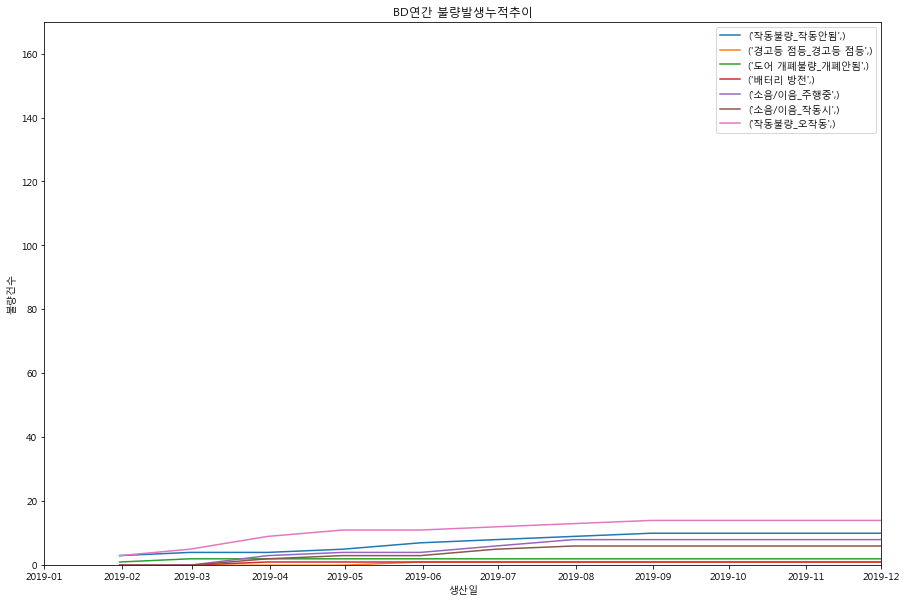

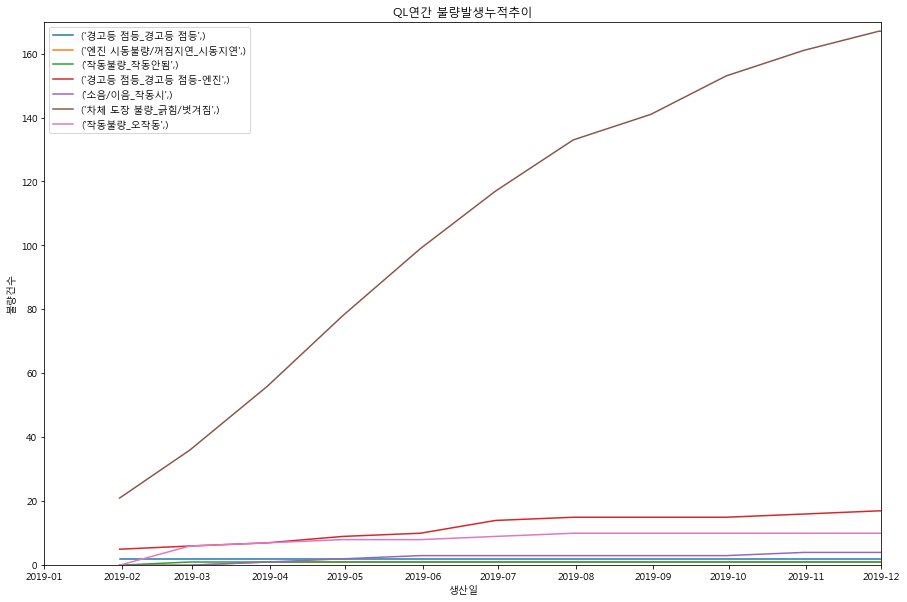

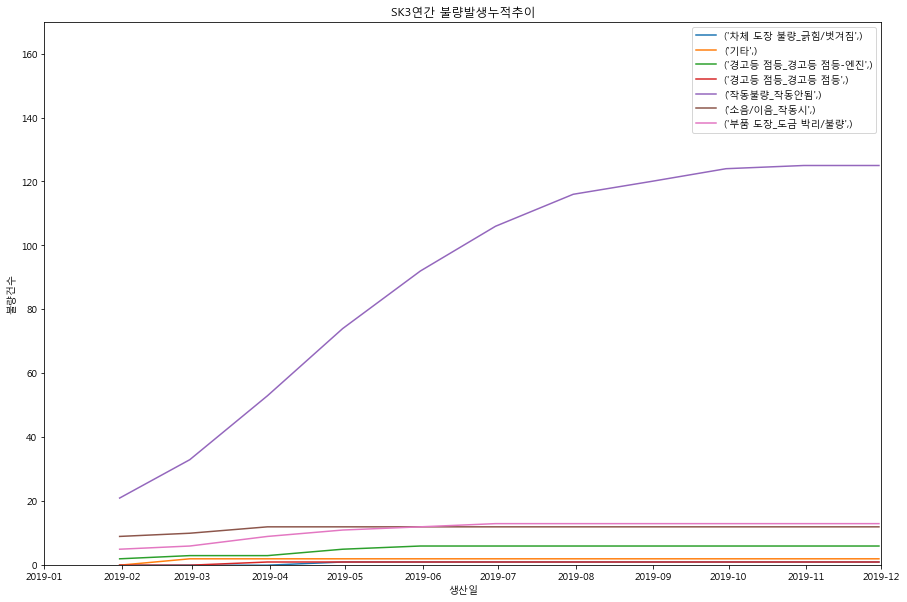

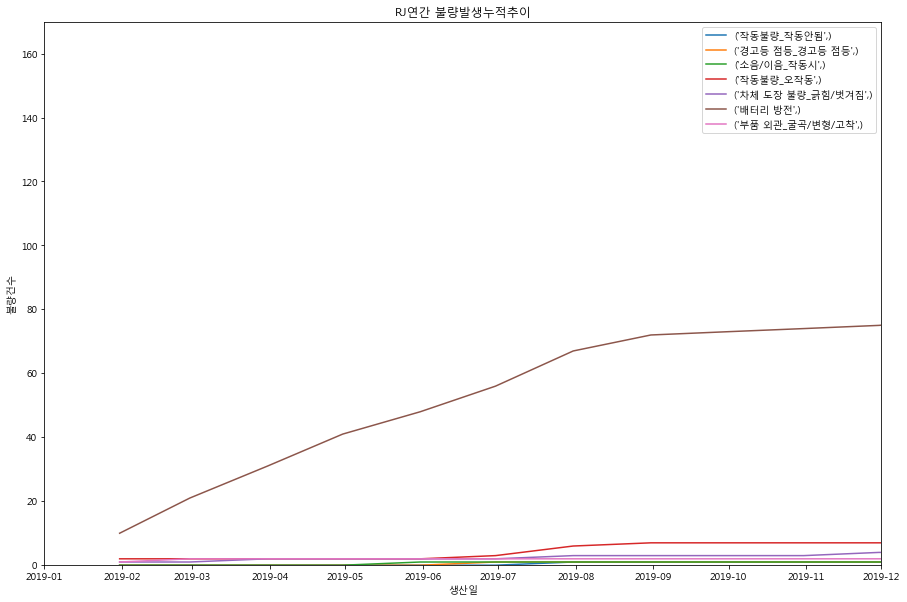

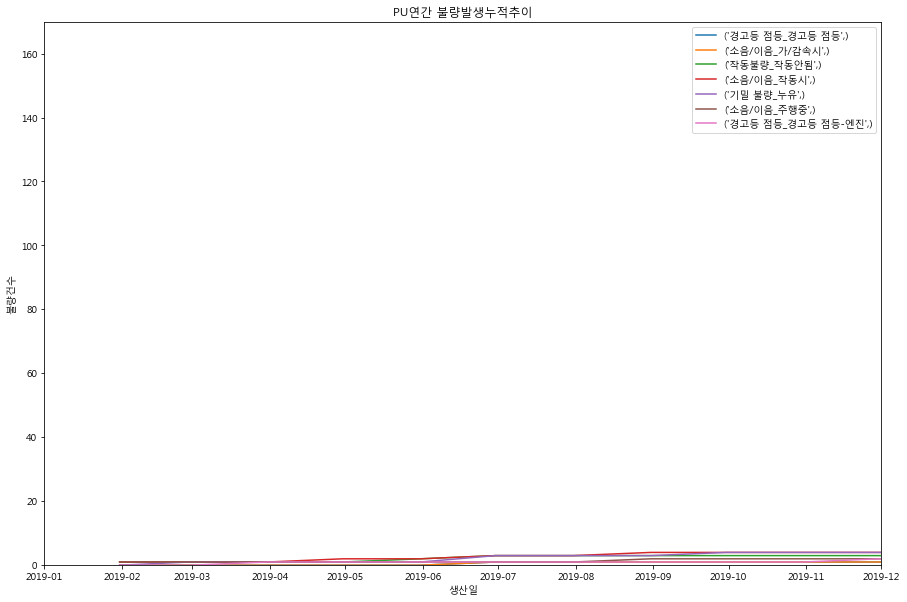

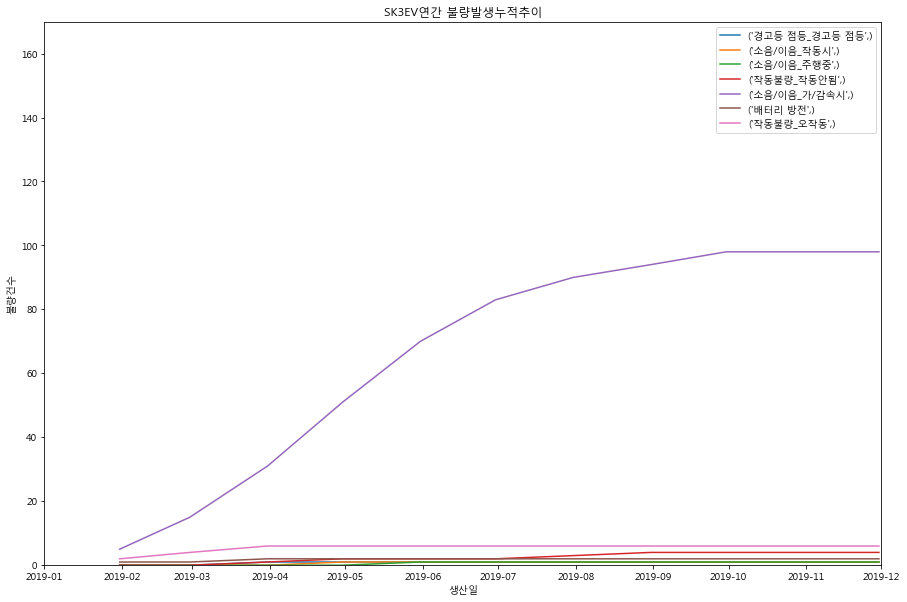

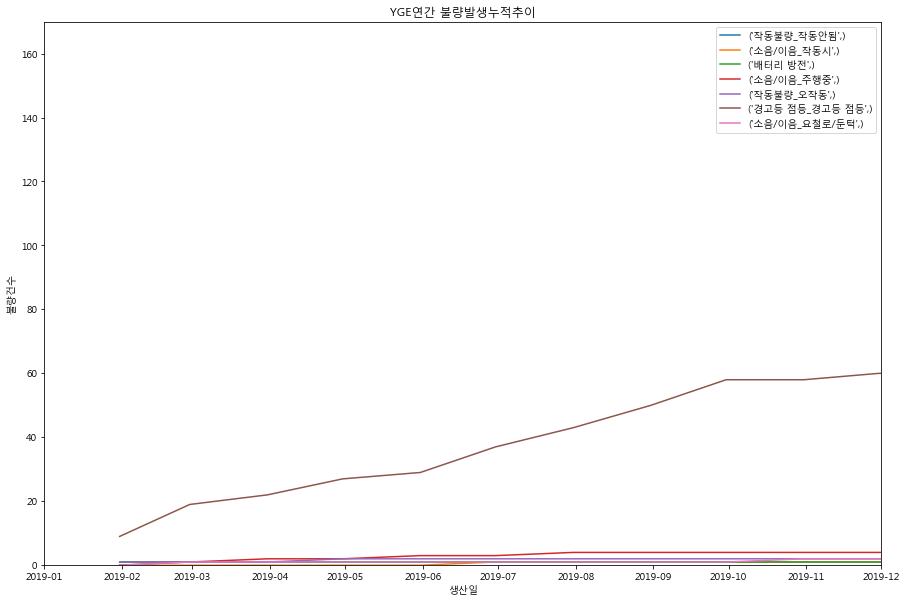

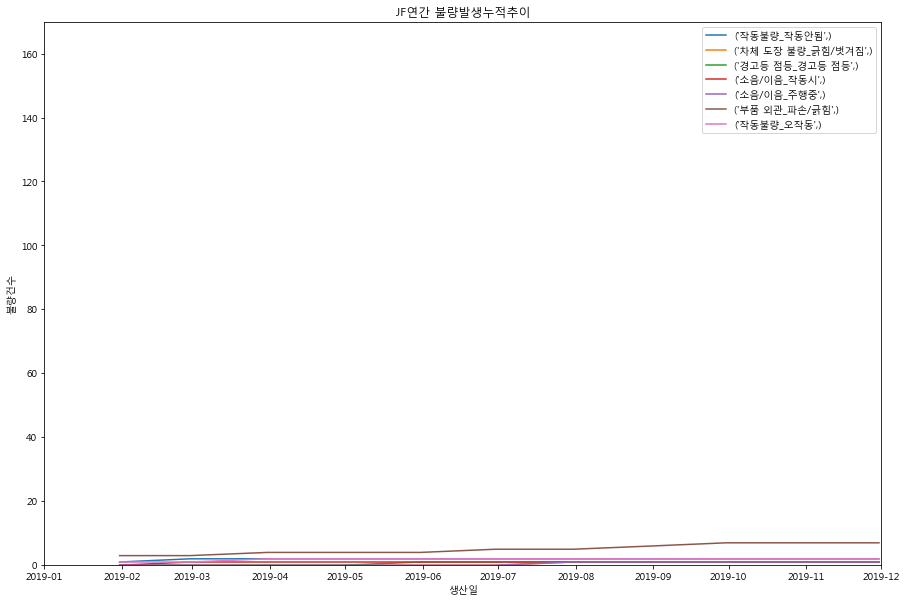

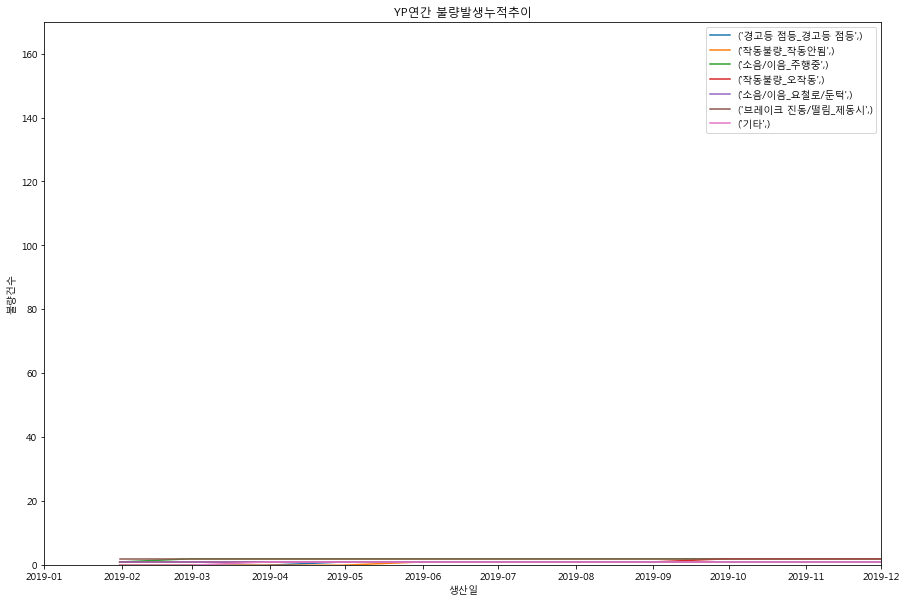

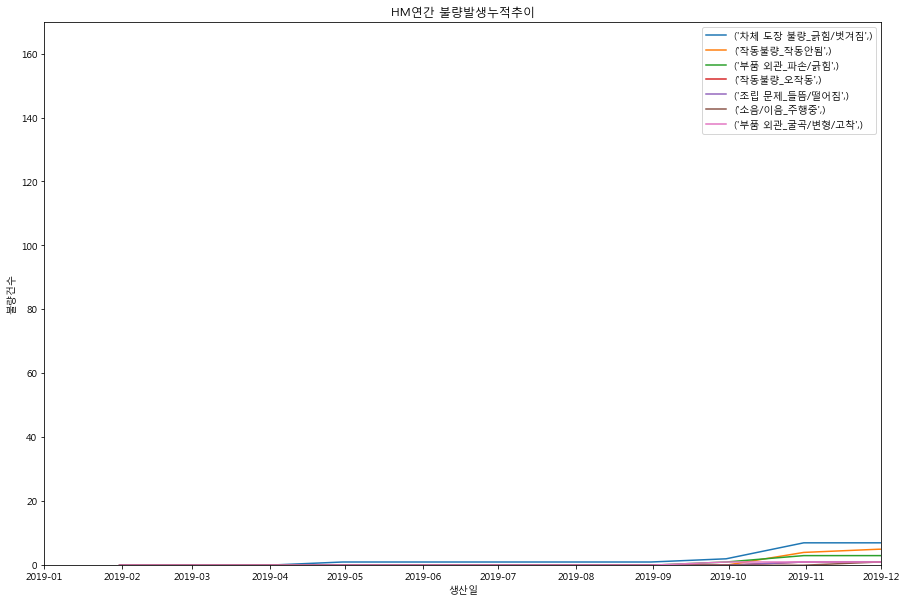

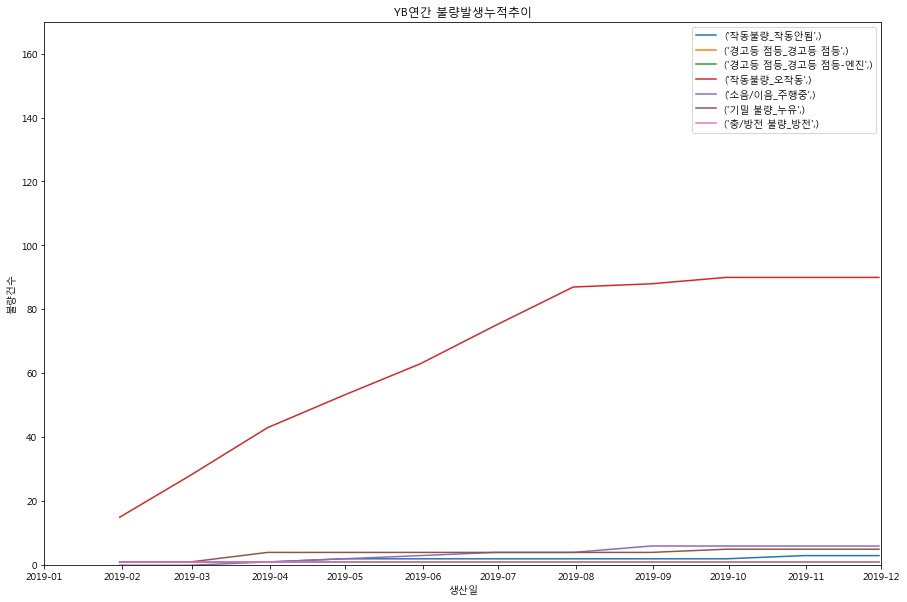

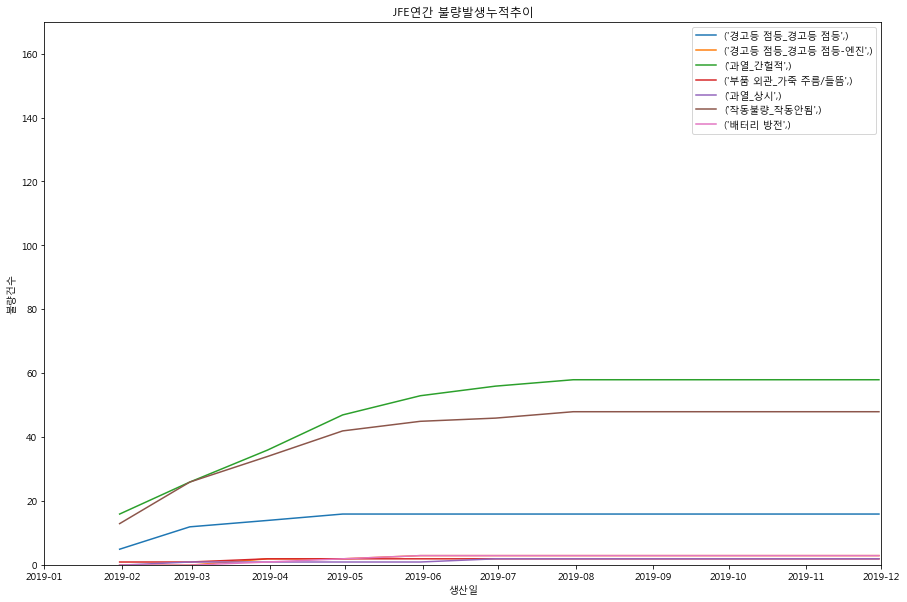

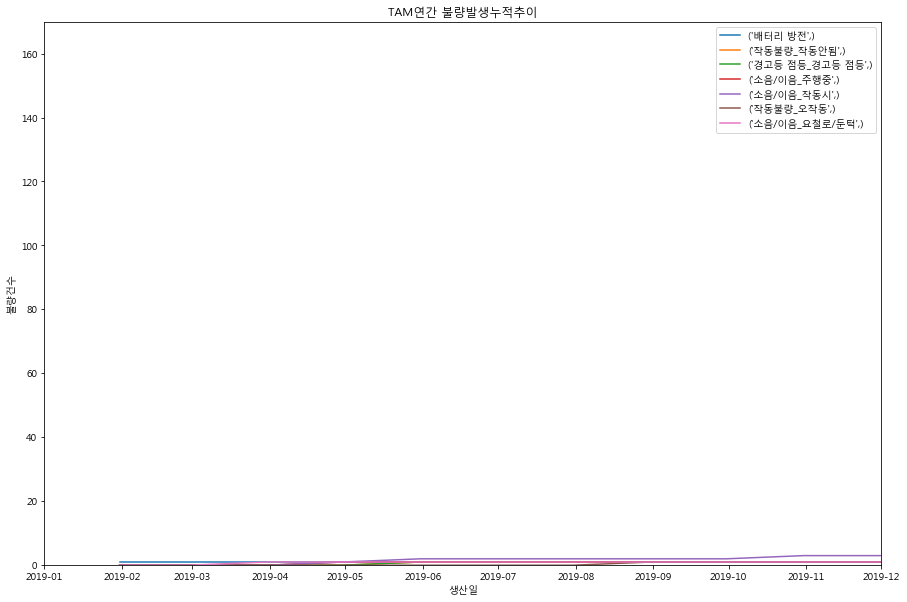

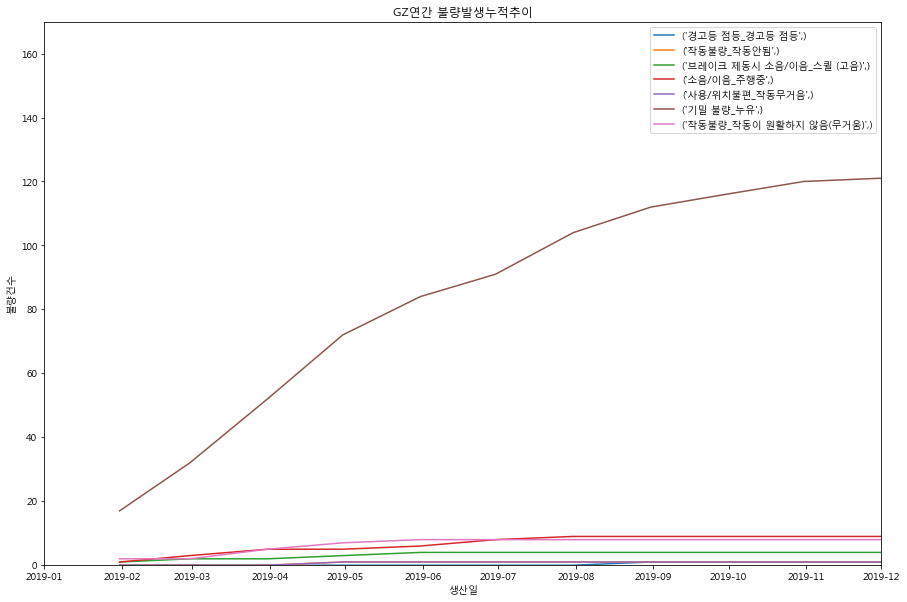

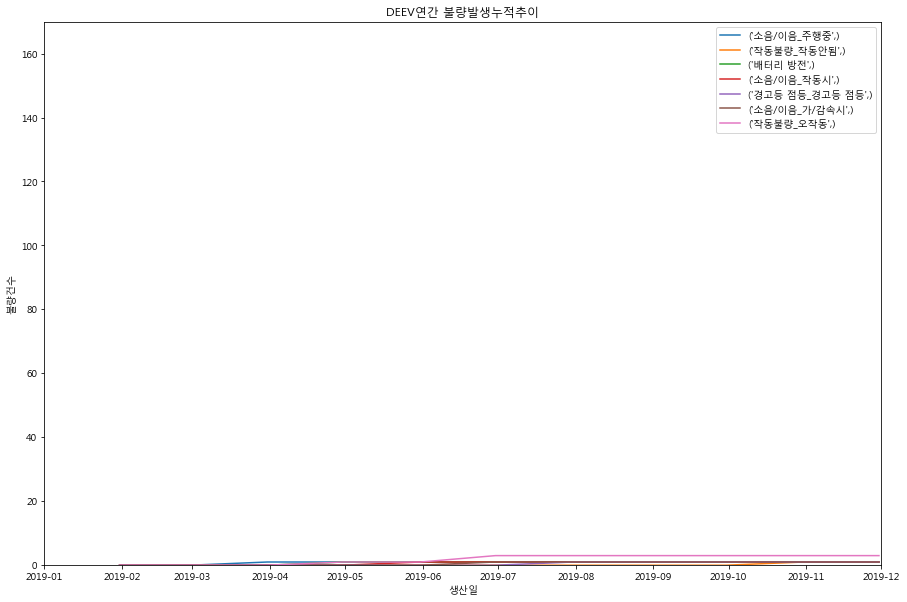

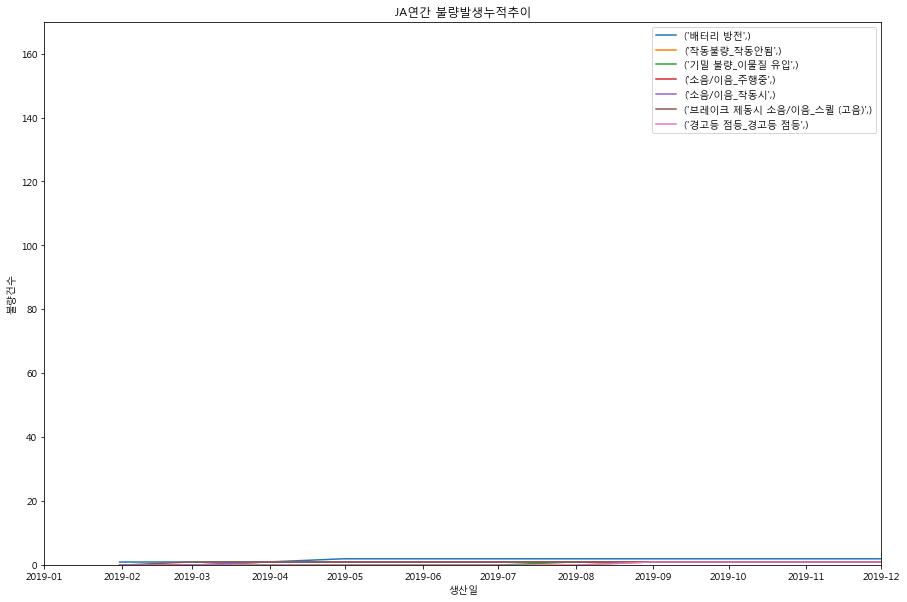

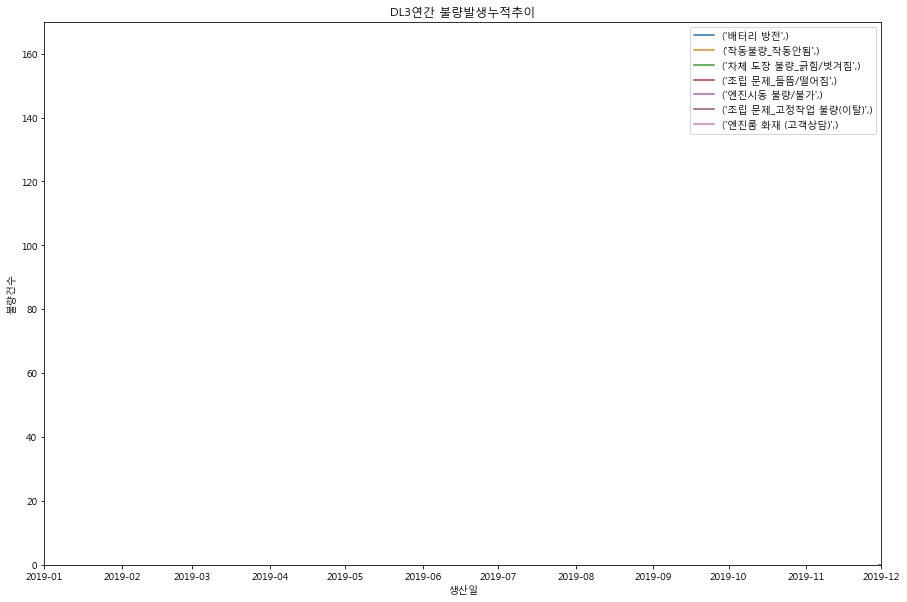

In [207]:
df1_model_list = df1['Project Name'].unique().tolist()
r = round(len(df_rest_BD.columns)/40)

for m in df1_model_list:    
    fig, ax = plt.subplots(1,1,figsize=(15,10))
    for i in range(r):
        ax.plot(globals()['df_rest_{}'.format(m)].index,
                globals()['df_rest_{}'.format(m)][globals()['df_rest_{}'.format(m)].columns[i]].cumsum(),
                label=globals()['df_rest_{}'.format(m)].columns[i])
        leg = ax.legend()
        ax.set_xlim('2019-01','2019-12')
        ax.set_ylim(0,170)
        ax.set_xlabel('생산일')
        ax.set_ylabel('불량건수')
        plt.title(m+'연간 불량발생누적추이')
        
        src = m + '차종 19년도 불량누적발생추이.png'
        fig.savefig(m + '차종 19년도 불량발생누적 추이.png')

In [119]:
fig, ax = plt.subplots(1,1,figsize=(15,10))

sns.pointplot(data=df1, x='생산일', y='')